In [1]:
from netCDF4 import Dataset
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm
import gsw

In [2]:
# upper_tick_locations = np.array([M2, M4, M6, f, week, month, yearly])
# upper_tick_labels = ['M2', 'M4', 'M6', 'f', 'week', 'month', 'year']
lat = 37 + .17/.6
lon = 32 + .16/.4
f = 2*np.sin(lat*np.pi/180)
M2 = 24/12.42# 1/(12.42*3600) # M2
S2 = 2
M4 = 24/6.21
M6 = 24/4.14
week = 1./7 # yeah, weekly freq.
month = 1./30 # yeah, monthly freq.
yearly = 1./365 # yeah, annual freq.

# z_min = min(PowerSpectra.keys())
# z_max = max(PowerSpectra.keys())
# print(z_min, z_max)
# N_z_min = lucky_bvf(z_min)*3600*24
# N_z_max = lucky_bvf(z_max)*3600*24
# print(N_z_min, N_z_max)

upper_tick_locations = np.array([M2, M4, M6, f, week, month, yearly])
upper_tick_labels = ['M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

upper_tick_locations_zoom = np.array([M2, M4, M6, f, 1])
upper_tick_labels_zoom = ['M2', 'M4', 'M6', 'f', 'day']

# Density

In [3]:
gsw.density.rho_t_exact
gsw.SA_from_SP?

In [4]:
Data = {}
year = 2012
lat = 37 + .17/.6
lon = 32 + .16/.4
with Dataset(f'../netcdf/{year}/sbe.nc', 'r') as nc:
    
    depth_y = list(nc['DEPTH'][:])
    print(depth_y)

    for d_i in depth_y:
        data_aux = {}
        print(d_i)
        
        try:
            temp_aux = np.array(nc[str(d_i)]['TEMP'][:])
            prac_sal = np.array(nc[str(d_i)]['PSAL'][:])
            pres_aux = np.array(nc[str(d_i)]['PRES'][:])
            abs_sal = gsw.SA_from_SP(prac_sal, pres_aux, lon, lat) # absolute salinity
        
            Data[d_i] = gsw.density.rho_t_exact(abs_sal, temp_aux, pres_aux)

        except:
            print(f'Not able to compute density for {year} - {d_i}.')


[1350, 1688, 1000]
1350
Not able to compute density for 2012 - 1350.
1688
Not able to compute density for 2012 - 1688.
1000


In [5]:
Data

{1000: array([1032.45032901, 1032.44496976, 1032.44392119, ..., 1032.4308721 ,
        1032.42694618, 1032.43191804])}

1000


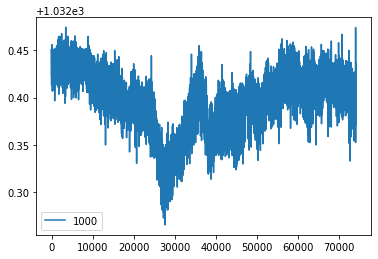

In [6]:
for dd in Data.keys():
    print(dd)
    plt.plot(Data[dd], label=dd)
    plt.legend()

1000


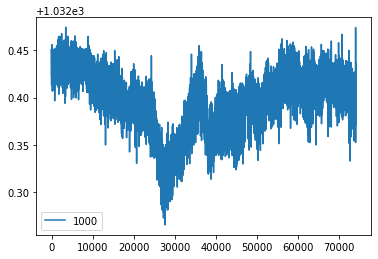

In [7]:
for dd in Data.keys():
    print(dd)
    plt.plot(Data[dd], label=dd)
    plt.legend()

# AFTER Pickling the psd of density

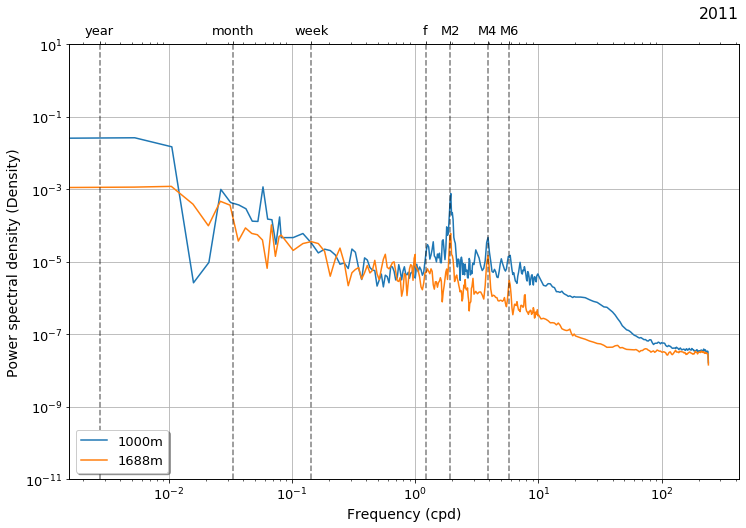

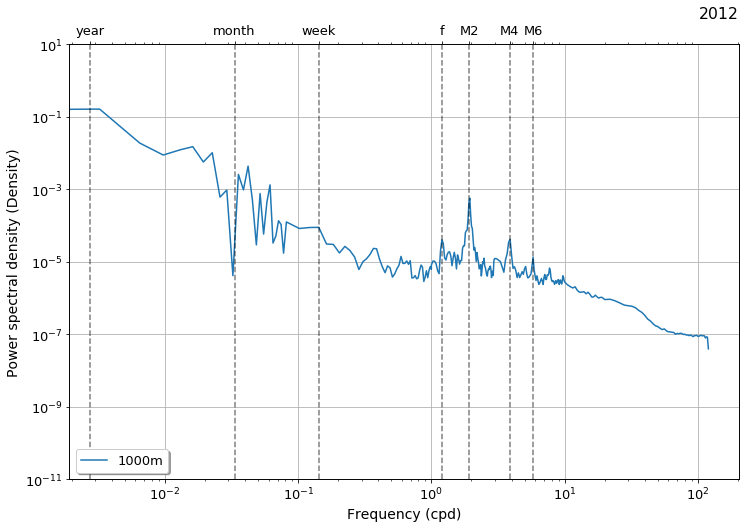

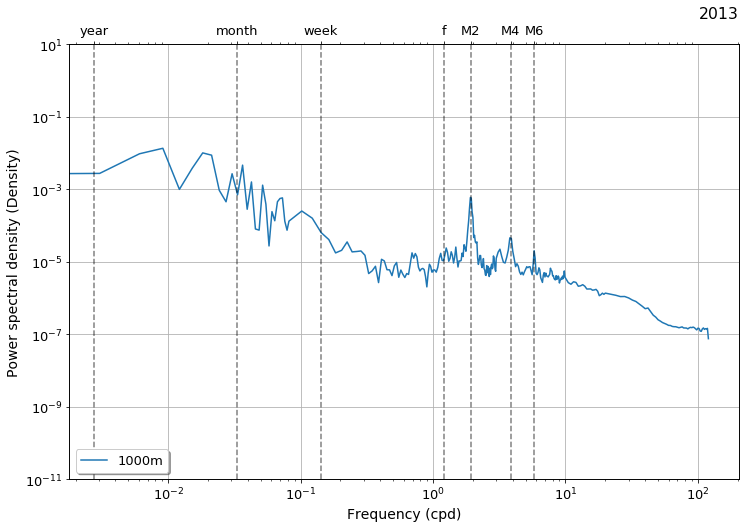

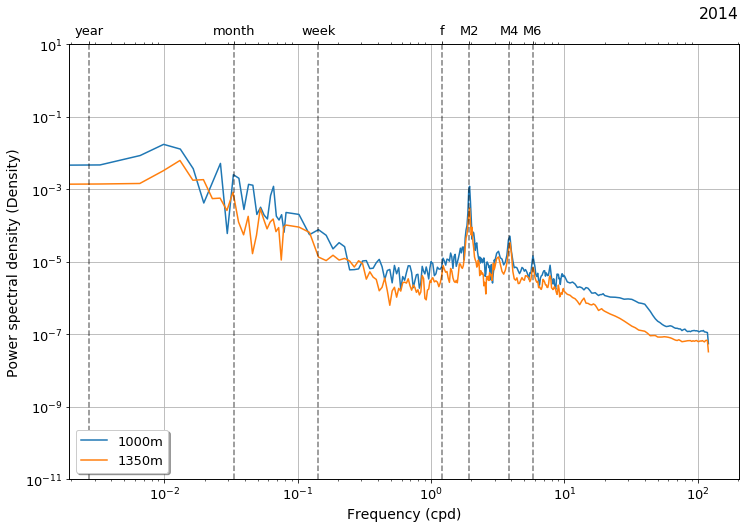

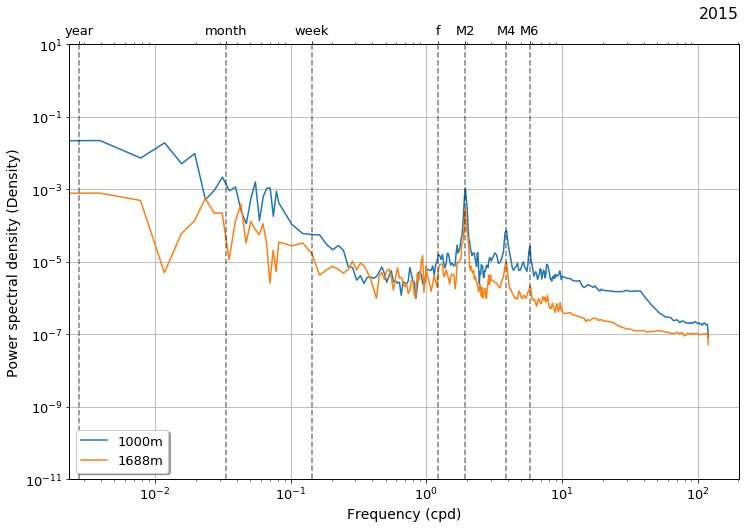

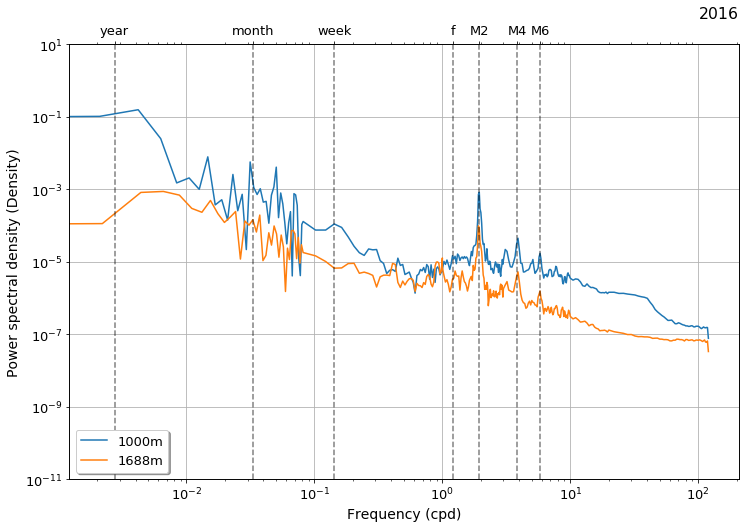

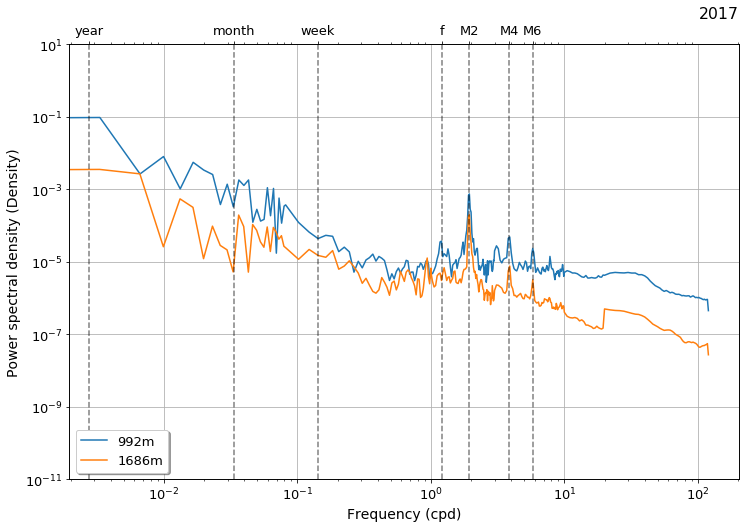

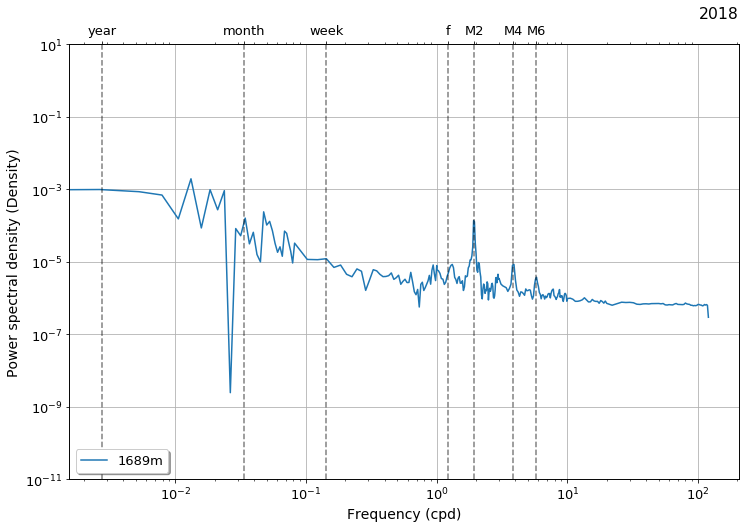

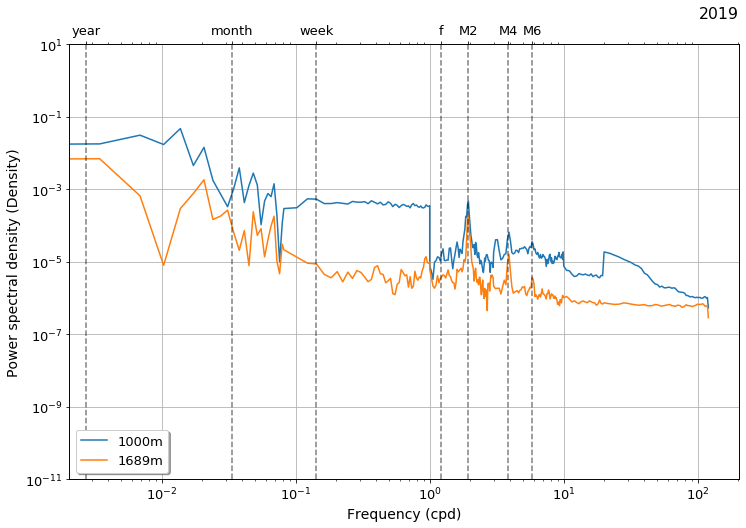

In [8]:
for year in range(2011, 2020):
    with open(f'../support_data/PowerSpectra/psd_density_{year}', 'rb') as f:
        PowerSpectra= pickle.load(f)

    plt.rcParams.update({'font.size': 13})
    # x_colors = np.linspace(0,1, len(PowerSpectra.keys()))
    # colors = cm.get_cmap('viridis_r')(x_colors)

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    for j, depth in enumerate(sorted(PowerSpectra.keys())):
        ax1.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], 
                   label=f"{depth:0.0f}m")#, c=colors[j])

    ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

    for typical_freq in upper_tick_locations:
        ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

    ax1.grid()
    ax1.set_xlabel('Frequency (cpd)', fontsize=14)
    ax1.set_ylabel('Power spectral density (Density)', fontsize=14)
    ax1.set_ylim(1e-11,1e1)
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(upper_tick_locations)
    ax2.set_xticklabels(upper_tick_labels)
    ax1.legend(loc='lower left', shadow=True)
    ax1.set_title(f'{year}', loc='right') # remove for publishing
    #### SAVE THIS ####

hell yeah!!

# Density vs Temperature

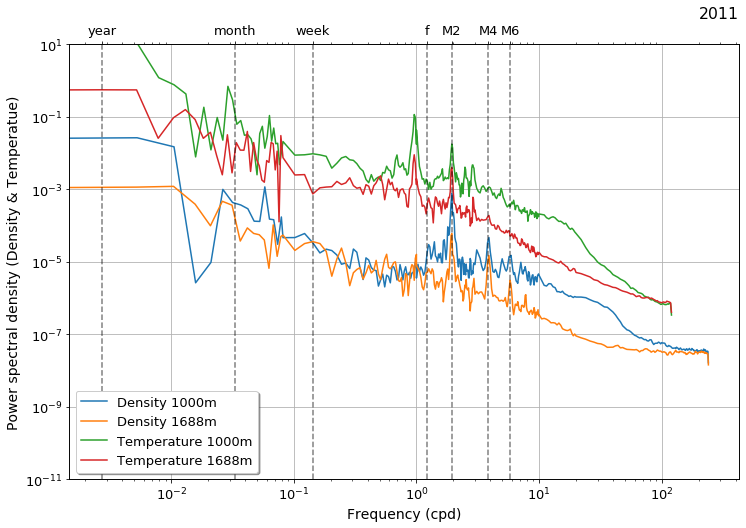

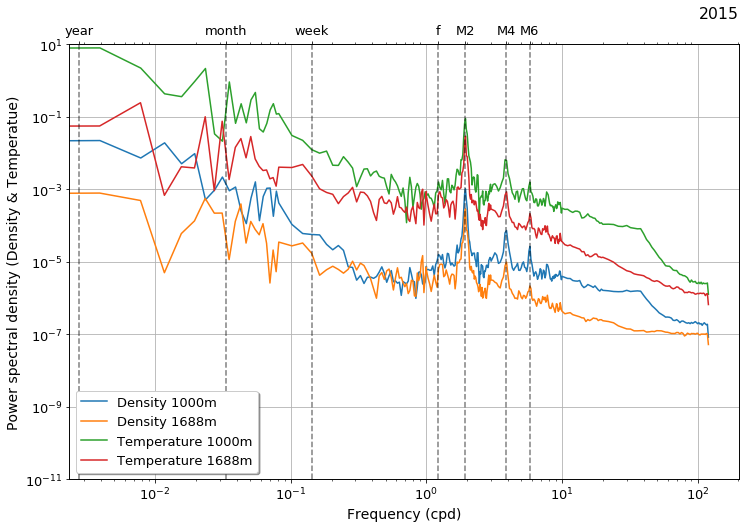

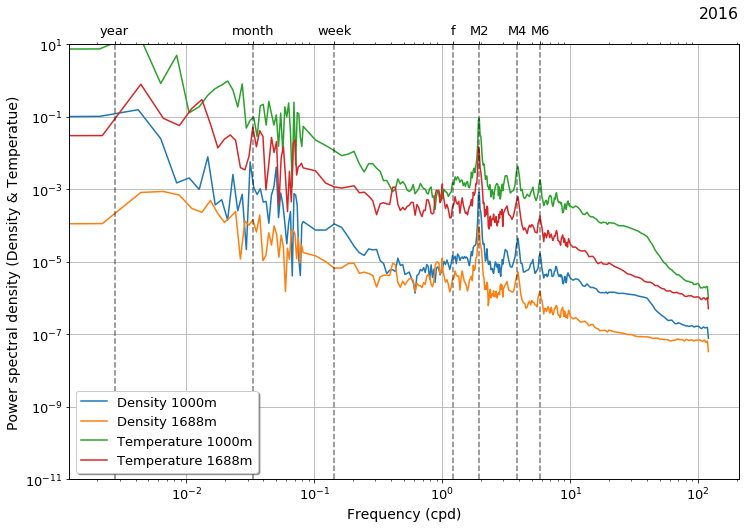

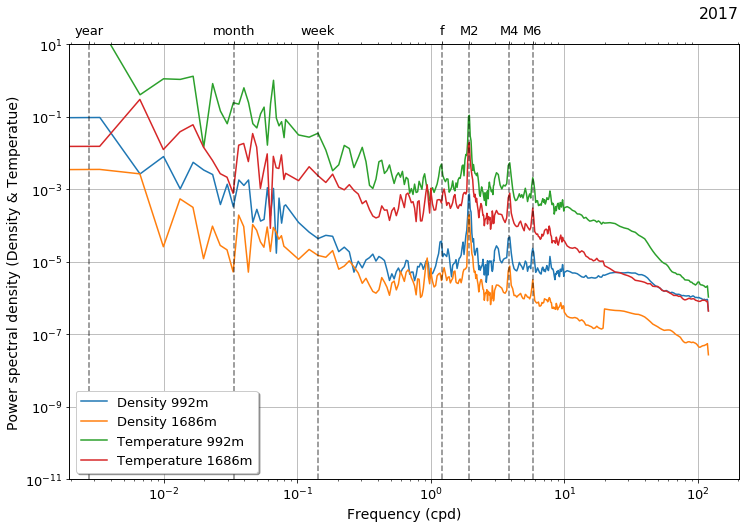

In [9]:
for year in [2011,2015,2016,2017]:
    with open(f'../support_data/PowerSpectra/psd_density_{year}', 'rb') as f:
        ps_density = pickle.load(f)
    with open(f'../support_data/PowerSpectra/psd_sbe_{year}', 'rb') as f:
        ps_temp = pickle.load(f)

    plt.rcParams.update({'font.size': 13})
    # x_colors = np.linspace(0,1, len(ps.keys()))
    # colors = cm.get_cmap('viridis_r')(x_colors)

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    for j, depth in enumerate(sorted(ps_density.keys())):
        ax1.loglog(ps_density[depth]['freq'], ps_density[depth]['psd'], 
                   label=f"Density {depth:0.0f}m")#, c=colors[j])
        
    for j, depth in enumerate(sorted(ps_temp.keys())):
        ax1.loglog(ps_temp[depth]['freq'], ps_temp[depth]['psd'], 
                   label=f"Temperature {depth:0.0f}m")#, c=colors[j])

    ax2.loglog(ps_density[depth]['freq'], ps_density[depth]['psd'], alpha=0)

    for typical_freq in upper_tick_locations:
        ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

    ax1.grid()
    ax1.set_xlabel('Frequency (cpd)', fontsize=14)
    ax1.set_ylabel('Power spectral density (Density & Temperatue)', fontsize=14)
    ax1.set_ylim(1e-11,1e1)
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(upper_tick_locations)
    ax2.set_xticklabels(upper_tick_labels)
    ax1.legend(loc='lower left', shadow=True)
    ax1.set_title(f'{year}', loc='right') # remove for publishing
    #### SAVE THIS ####

## zoom 

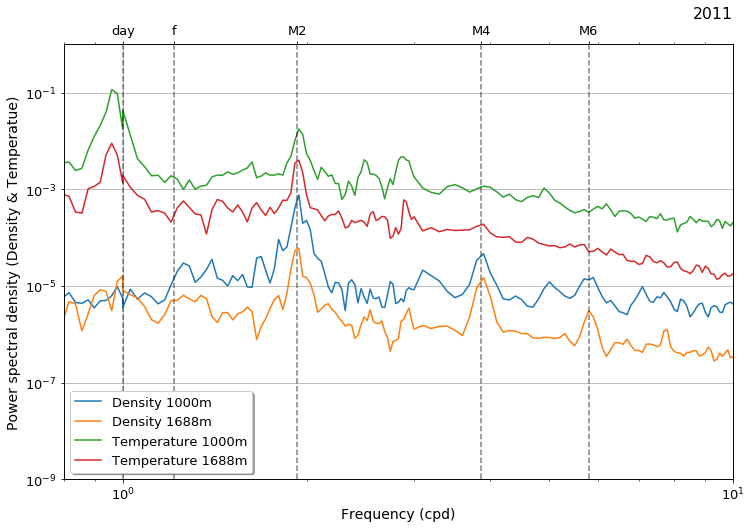

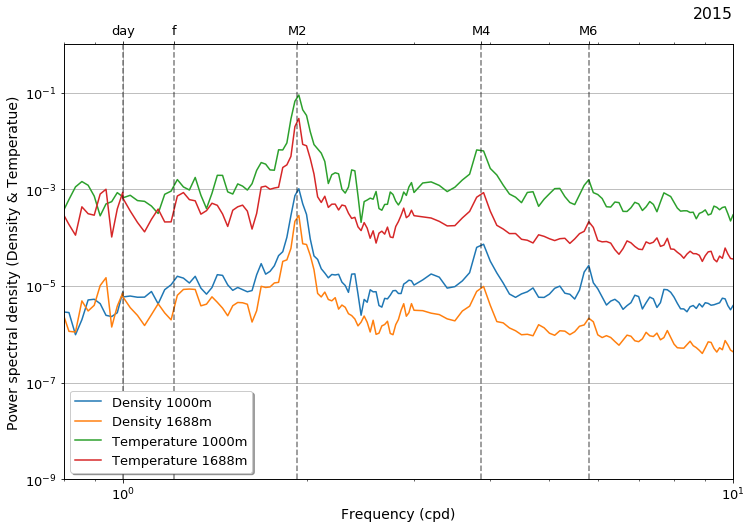

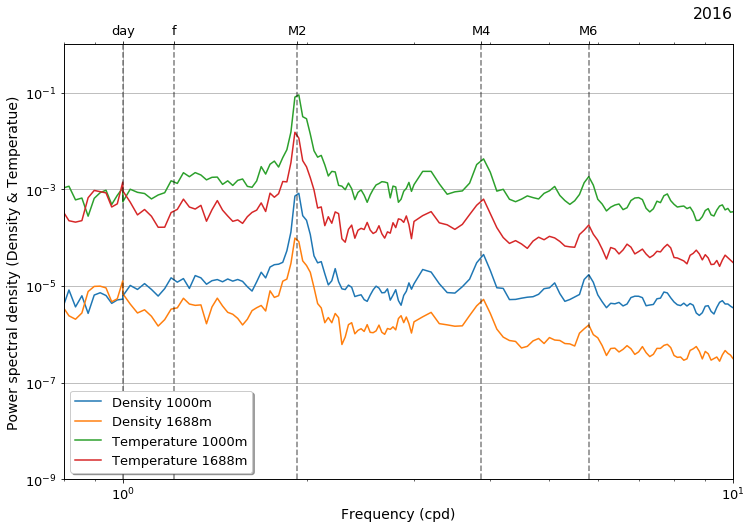

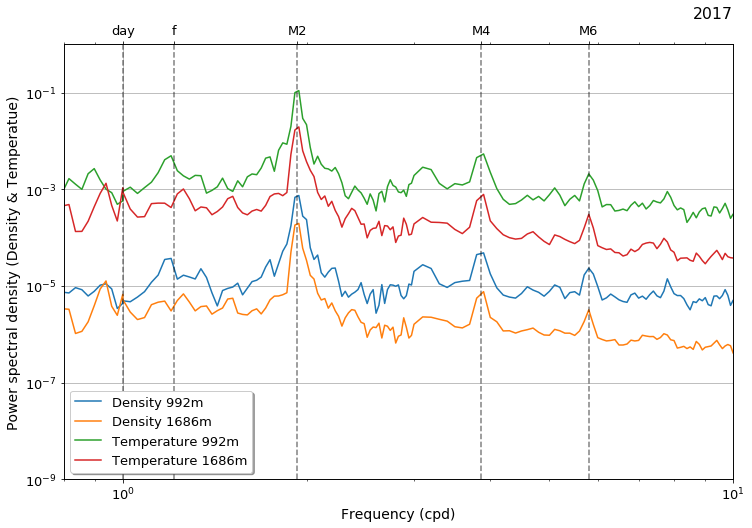

In [10]:
for year in [2011,2015,2016,2017]:
    with open(f'../support_data/PowerSpectra/psd_density_{year}', 'rb') as f:
        ps_density = pickle.load(f)
    with open(f'../support_data/PowerSpectra/psd_sbe_{year}', 'rb') as f:
        ps_temp = pickle.load(f)

    plt.rcParams.update({'font.size': 13})
    # x_colors = np.linspace(0,1, len(ps.keys()))
    # colors = cm.get_cmap('viridis_r')(x_colors)

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    for j, depth in enumerate(sorted(ps_density.keys())):
        ax1.loglog(ps_density[depth]['freq'], ps_density[depth]['psd'], 
                   label=f"Density {depth:0.0f}m")#, c=colors[j])
        
    for j, depth in enumerate(sorted(ps_temp.keys())):
        ax1.loglog(ps_temp[depth]['freq'], ps_temp[depth]['psd'], 
                   label=f"Temperature {depth:0.0f}m")#, c=colors[j])

    ax2.loglog(ps_density[depth]['freq'], ps_density[depth]['psd'], alpha=0)

    for typical_freq in upper_tick_locations_zoom:
        ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

    ax1.grid()
    ax1.set_xlabel('Frequency (cpd)', fontsize=14)
    ax1.set_ylabel('Power spectral density (Density & Temperatue)', fontsize=14)
    ax1.set_xlim(0.8, 1e1)
    ax2.set_xlim(0.8, 1e1)

    ax1.set_ylim(1e-9,1e0)
    ax2.set_ylim(1e-9,1e0)
    
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(upper_tick_locations_zoom)
    ax2.set_xticklabels(upper_tick_labels_zoom)
    ax1.legend(loc='lower left', shadow=True)
    ax1.set_title(f'{year}', loc='right') # remove for publishing
    #### SAVE THIS ####

In [11]:
from IPython.display import display, Markdown, Latex
display(Markdown('
![Drag Racing]()'))
# If you particularly want to display maths, this is more direct:
display(Latex('\phi'))

SyntaxError: EOL while scanning string literal (<ipython-input-11-5c1760dabe4a>, line 2)

In [ ]:
from netCDF4 import Dataset